### <code> Bibliotecas y variables globales</code>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
# heapSort
I_DF_ORD_DURAC = pd.read_csv("./info_ordenada_i_duracion.csv")
DF_ORD_DURA = pd.read_csv("./info_ordenada_duracion.csv")
# quickSort
DF_ORD_ISRC = pd.read_csv("./info_ordenada_isrc.csv")
I_DF_ORD_ISRC = pd.read_csv("./info_ordenada_i_isrc.csv")
CASO_PROMEDIO = pd.read_csv("./data.csv")
TESTS = 999
def generarCsv(listaMusica,header):
    df = {}
    for field in header:
        if not field in df:
            df[field]=[]
    for musica in listaMusica:
        i=0
        # self.trackName = data[0]
        # self.artist = data[1]
        # self.album = data[2]
        # self.isrc = data[3]
        # self.duration = data[4]
        # self.year = data[5]
        # self.month = data[6]
        # self.day = data[7]
        while i < len(header):
            if i==0:
                df[header[i]].append(musica.trackName)
                pass
            elif i==1:
                df[header[i]].append(musica.artist)
                pass
            elif i==2:
                df[header[i]].append(musica.album)
                pass
            elif i==3:
                df[header[i]].append(musica.isrc)
                pass
            elif i==4:
                df[header[i]].append(musica.duration)
                pass
            elif i==5:
                df[header[i]].append(musica.year)
            elif i==6:
                df[header[i]].append(musica.month)
                pass
            elif i==7:
                df[header[i]].append(musica.day)
            i+=1
    return df

# <code>Clases</code>

In [12]:
class Music:
    def __init__(self,data) -> None:
        self.trackName = data[0]
        self.artist = data[1]
        self.album = data[2]
        self.isrc = data[3]
        self.duration = data[4]
        self.date = data [5:]
    def __repr__(self) -> str:
        str = f"Track Name: {self.trackName}\n"
        str+= f"\tArtist: {self.artist}\n"
        str+= f"\tAlbum: {self.album}\n"
        str+= f"\tIsrc: {self.isrc}\n"
        str+= f"\tDuration(min): {self.duration}\n"
        str+= f"\tDate: {self.date[0]}/{self.date[1]}/{self.date[2]}"
        return str
import math as mt
class Sort:
    def __init__(self,compare) -> None:
        self.compare = compare
        self.math = mt
        self.cont = 0

    def hIzq(self,i):               #O(1)
        return 2*i+1                #6
    #P(n) = 6

    def hDer(self,i):               #O(1)
        return 2*i+2                #5
    #P(n) = 5
    
    def intercambia(self,A,x,y):    #O(1)
        tmp = A[x]                  #4
        A[x] = A[y]                 #4
        A[y] = tmp                  #3
    #P(n) = 11

    def maxHeapify (self,A,i,tamanoHeap):                       #O(log_2 n)
        self.cont+=1
        L=self.hIzq(i)                                          #4 * O(1) * O(log_2 n)
        R=self.hDer (i)                                         #4 * O(1) * O(log_2 n)
        if(L<=(tamanoHeap-1) and self.compare(A[L],A[i])):      #11 * O(log_2 n)
            posMax=L                                            #3 * O(log_2 n)
        else:                                                   #1 * O(log_2 n)
            posMax=i                                            #3 * O(log_2 n)
        if (R<=(tamanoHeap-1) and self.compare(A[R],A[posMax])):#11 * O(log_2 n)
            posMax=R                                            #2 * O(log_2 n)
        if(posMax != i):                                        #4 * O(log_2 n)
            self.intercambia(A,i,posMax)                        #4 * O(1) * O(log_2 n)
            self.maxHeapify(A, posMax, tamanoHeap)              #4 * O(log_2 n) * O(log_2 n)
    #P(n) = 47*(log_2 n)+4*(log_2 n)^2

    def construirHeapMaxIni (self, A, tamanoHeap): 
        for i in range (self.math.ceil((tamanoHeap-1)/2),-1,-1):  #(n+1) / 2 + 1
            self.cont+=1
            self.maxHeapify (A,i, tamanoHeap)                     # O(log_2 n ) * (n+1) / 2
    #P(n) = (((n+3)/2)+((n+1)/2))*(log_2 n)
        
        
    def heapSort(self,A,tamanoHeap):                #O(n * log_2 n)
        self.construirHeapMaxIni(A,tamanoHeap)      #3 * log_2 n
        for i in range(len(A)-1,0,-1):              #(n-1) + 1
            self.intercambia(A,0,i)                 #4 * (n-1) * O(1)
            tamanoHeap = tamanoHeap-1               #4 * (n-1)
            self.maxHeapify(A,0,tamanoHeap)         #4 * log_2 n * (n-1)
    #P(n) = 7n*(log_2 n)+ 9n - 4 * (log_2 n) - 8
        
    def particionar(self,A,p,r):                    #O(n)  n -> r-p
        x=A[p]                                      #4
        i=p                                         #3
        for j in range(p+1, r+1):                   #9 * (n+1)
            self.cont+=1                            
            if (self.compare(A[j],x)):              #5 * n
                i=i+1                               #4 * n
                self.intercambia(A,i,j)             #4 * n
        self.intercambia(A,i,p)                     #4
        return i                                    #2
    #P(n)= 22n+22

    def quickSort (self,A,p,r):                     #O(log_2 n)
        self.cont+=1                                
        if (p<r):                                   #4 * O(log_2 n)
            q=self.particionar(A,p,r)               #6 * O(n) * O(log_2 n)
            self.quickSort(A,p,q-1)                 #6 * O(log_2 n) * O(log_2 n)
            self.quickSort(A,q+1,r)                 #6 * O(log_2 n) * O(log_2 n)


    #P(n) = 6 n * log_2 n + 12*(log_2 n)^2 + 4 * log_2 n

# <code>QuickSort</code>
### Caso promedio y mejor caso.
En un caso aleatorio con diferentes acomodos, el algoritmo logra desarrollar una complejidad $n\ \log_{2} n$ principalmente porque en cada llamada se generan dos intervalos que a su vez generan otros 2 y así sucesivamente hasta que por definicion un conjunto con un solo elemento ya esta ordenado.

In [22]:

X=range(TESTS)
musicas = []
for i in X:
    info = list(CASO_PROMEDIO.iloc[i])
    musica = Music(info)
    musicas.append(musica)
Y = []
# for i in X:
#     testCase = musicas[:i+1]
#     sort = Sort(lambda a,b: a.isrc <= b.isrc)
#     sort.quickSort(testCase,0,len(testCase)-1)
#     Y.append(sort.cont)
# plt.plot(X,Y)
# plt.xlabel("Longitud del arreglo")
# plt.ylabel("Operaciones realizadas")
# plt.show()

h=list(CASO_PROMEDIO.columns)
sort = Sort(lambda a,b: a.year >= b.year)
sort.quickSort(musicas,0,len(musicas)-1)
print(musicas,len(musicas))
df = generarCsv(musicas,h)
df = pd.DataFrame(df)
df.to_csv("./info_ordenada_i_year.csv",index=False)


[Track Name: Get Down Saturday Night
	Artist: Gorgon Breath
	Album: Get Down Saturday Night
	Isrc: DES232100630
	Duration(min): 225
	Date: 2022/7/2, Track Name: Here Comes the Rush
	Artist: Harrison
	Album: Here Comes the Rush
	Isrc: DES232200180
	Duration(min): 140
	Date: 2022/7/23, Track Name: Light
	Artist: Nu Aspect
	Album: Light
	Isrc: DES232000080
	Duration(min): 127
	Date: 2022/2/28, Track Name: 17 Años
	Artist: Los Ángeles Azules
	Album: Singles
	Isrc: MXUM70801373
	Duration(min): 149
	Date: 2022/9/4, Track Name: Bomboro Quiñá Quiñá (with Rubén Albarrán) - En Vivo
	Artist: La Sonora Santanera
	Album: La Sonora Santanera en Su 60 Aniversario
	Isrc: MXF011600062
	Duration(min): 143
	Date: 2022/11/12, Track Name: Amigos Nada Más
	Artist: Los Ángeles Azules
	Album: Como Te Voy A Olvidar (Baile Total)
	Isrc: MXUM70801372
	Duration(min): 286
	Date: 2022/3/21, Track Name: Hechicería
	Artist: La Sonora Dinamita
	Album: Juntos Por La Sonora
	Isrc: MXUM71501793
	Duration(min): 105
	Date:

### Peor caso.
Para el peor caso *(ordenado de manera ascendente o descendente)* el problema esta en que el pivote seria el minimo o maximo de nuestro conjunto delimitado por $p+1$ hasta $r$, en el caso de que sea mínimo jamás se hará un intercambio y por tanto $i$ sería igual a $p$, el cual en el contexto de QuickSort quedaría como $q$ provocando que en la primer llamada recursiva no genere una pila de llamadas pero en la segunda llamada recursiva avanza de uno en uno ya que nos encontrariamos siempre en el primer caso planteado en donde el pivote sea el menor del intervalo dandole a $p$ un comportamienta como el siguiente: $p+1+1+...r$
Para cuando el conjunto esta ordenado de manera inversa $q$ tendria el valor de $r$ porlo que la primer llamada seria ahora la que se desarrollaria y $q$ tendria un comportamiento: $r-1-1-...p$

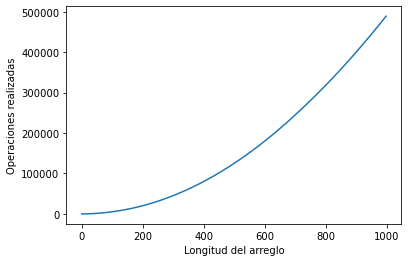

In [4]:
# ordenado de manera ascendente
X=range(TESTS)
musicas = []
for i in X:
    info = list(DF_ORD_ISRC.iloc[i])
    musica = Music(info)
    musicas.append(musica)
Y = []

for i in X:
    testCase = musicas[:i+1]
    sort = Sort(lambda a,b: a.isrc <= b.isrc)
    sort.quickSort(testCase,0,len(testCase)-1)
    Y.append(sort.cont)
plt.plot(X,Y)
plt.xlabel("Longitud del arreglo")
plt.ylabel("Operaciones realizadas")
plt.show()

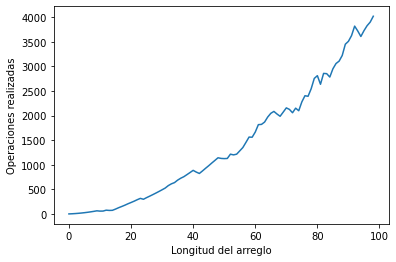

In [11]:
#ordenado de manera descendente
X=range(TESTS)
musicas = []
for i in X:
    info = list(I_DF_ORD_ISRC.iloc[i])
    musica = Music(info)
    musicas.append(musica)
Y = []
for i in X:
    testCase = musicas[:i+1]
    sort = Sort(lambda a,b: a.isrc <= b.isrc)
    sort.quickSort(testCase,0,len(testCase)-1)
    Y.append(sort.cont)
plt.plot(X,Y)
plt.xlabel("Longitud del arreglo")
plt.ylabel("Operaciones realizadas")
plt.show()

# <code>HeapSort</code>
### Caso promedio, peor caso y mejor caso.
El funcionamiento de Heapsort se basa en primero crear un montículo máximo con los valores del conjunto. Sabiendo que existen $n!$ donde $n=|A|$ permutaciones del conjunto $A$ todas ellas terminan en el mismo montículo máximo por lo que no importando su acomodo partiremos del mismo orden inicial.
Se garantiza que para todas las permutaciones construirHeapMaxInit: tiene una complejidad de $n\ \log_{2} n$ debido a que en el cuerpo de esta función existe un ciclo for con complejidad $n$ que a su vez llama a <code>maxHeapify</code> en cada iteración.
Por otra parte, en <code>maxHeapify</code> su principal condición de paro es que los valores del índice para los dos hijos quedan fuera del rango y esto lo hace en un tiempo $\log_{2} n$ pues estamos avanzando de manera exponencial. Una vez construido el montículo máximo solo nos queda hacer el intercambio entre la raíz y la última posición para posteriormente volver a balancear la estructura pero en un intervalo reducido en 1 para cada iteración.

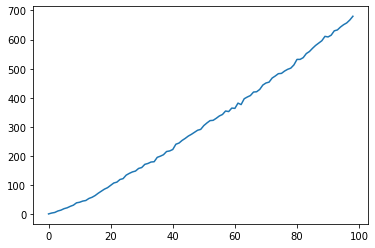

In [6]:
# caso promedio
X=range(TESTS)
musicas = []
for i in X:
    info = list(CASO_PROMEDIO.iloc[i])
    musica = Music(info)
    musicas.append(musica)
Y = []

for i in X:
    testCase = musicas[:i+1]
    sort = Sort(lambda a,b: a.duration > b.duration)
    sort.heapSort(testCase,len(testCase))
    Y.append(sort.cont)
plt.plot(X,Y)
plt.xlabel("Longitud del arreglo")
plt.ylabel("Operaciones realizadas")
plt.show()

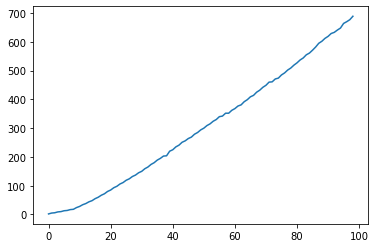

In [7]:
# ordenado de manera ascendente
X=range(TESTS)
musicas = []
for i in X:
    info = list(DF_ORD_DURA.iloc[i])
    musica = Music(info)
    musicas.append(musica)
Y = []

for i in X:
    testCase = musicas[:i+1]
    sort = Sort(lambda a,b: a.duration > b.duration)
    sort.heapSort(testCase,len(testCase))
    Y.append(sort.cont)
plt.plot(X,Y)
plt.xlabel("Longitud del arreglo")
plt.ylabel("Operaciones realizadas")
plt.show()

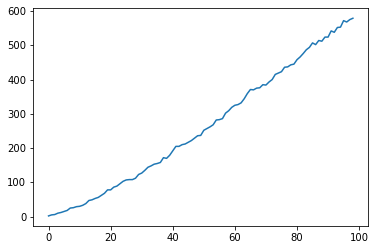

In [8]:
# ordenado de manera descendente
X=range(TESTS)
musicas = []
for i in X:
    info = list(I_DF_ORD_DURAC.iloc[i])
    musica = Music(info)
    musicas.append(musica)
Y = []

for i in X:
    testCase = musicas[:i+1]
    sort = Sort(lambda a,b: a.duration > b.duration)
    sort.heapSort(testCase,len(testCase))
    Y.append(sort.cont)
plt.plot(X,Y)
plt.xlabel("Longitud del arreglo")
plt.ylabel("Operaciones realizadas")
plt.show()